In [1]:
pip install pandas numpy matplotlib tensorflow keras opencv-python scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.Collecting pandas
     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     -------------------------------------  163.8/167.9 kB 9.6 MB/s eta 0:00:01
     -------------------------------------- 167.9/167.9 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.5 MB 19.2 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/11.5 MB 13.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/11.5 MB 12.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.5 MB 12.9 MB/s eta 0:00:01
   ---------- ----------------------------- 3.0/11.5 MB 12.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.5 MB 12.3 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install tensorflow keras opencv-python pandas numpy matplotlib scikit-learn seaborn

In [3]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl (7.5 kB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\arkak\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\arkak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

import os
import tensorflow as tf
import keras
import cv2

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50V2

#this

In [2]:
train_dir = 'train/'
test_dir = 'test/'

def Classes_count(path,name):
  Classes_Dict={}

  for Class in os.listdir(path):

    Full_Path= path + Class
    Classes_Dict[Class]=len(os.listdir(Full_Path))

  df =pd.DataFrame(Classes_Dict,index=[name])

  return df

Train_count= Classes_count(train_dir,'Train').transpose().sort_values(by='Train',ascending=False)
Test_count= Classes_count(test_dir,'Test').transpose().sort_values(by='Test',ascending=False)

#this


In [3]:
pd.concat([Train_count,Test_count],axis=1)
#this

,Train,Test
happy,7215,1774
neutral,4965,1233
sad,4830,1247
fear,4097,1024
angry,3995,958
surprise,3171,831
disgust,436,111


<Axes: >

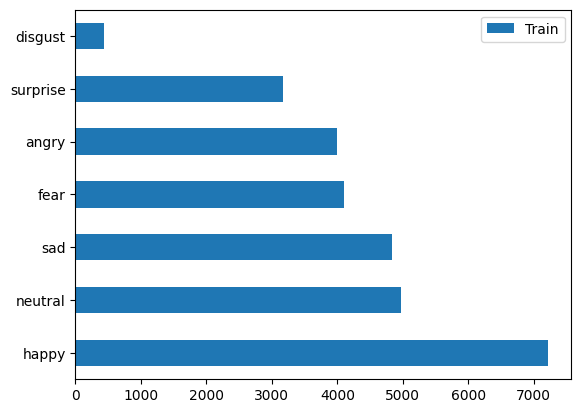

In [4]:
Train_count.plot(kind='barh')
#this

<Axes: >

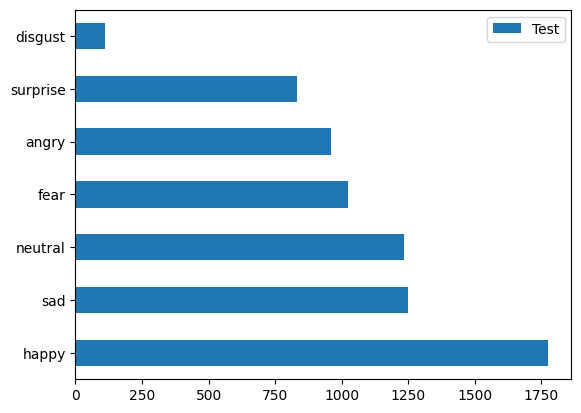

In [5]:
Test_count.plot(kind='barh')
#this

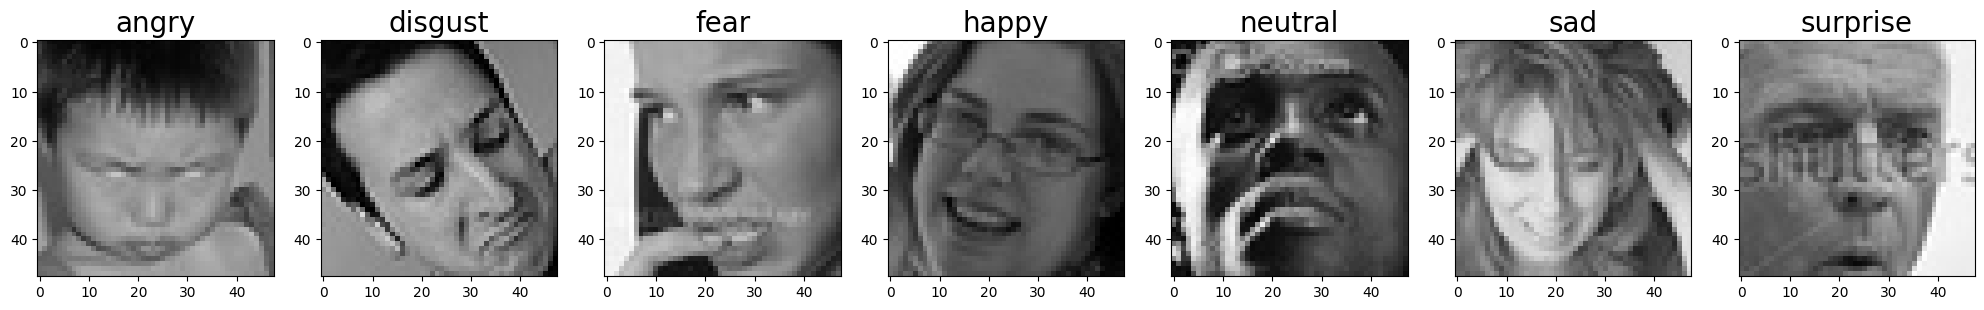

In [6]:
plt.style.use('default')
plt.figure(figsize=(25,8))
image_count=1
BASE_URL='train/'

for directory in os.listdir(BASE_URL):
  if directory[0] != '.':
    for i,file in enumerate(os.listdir(BASE_URL+directory)):
      if i==1:
        break
      else:
        fig=plt.subplot(1,7,image_count)
        image_count+=1
        image=cv2.imread(BASE_URL+directory+'/'+file)
        #image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(directory,fontsize=20)

#this

In [8]:
img_shape=48
batch_size=64
train_data_path='train/'
test_data_path='test/'

#this

In [9]:
train_preprocessor=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_preprocessor=ImageDataGenerator(
    rescale=1./255
)

train_data=train_preprocessor.flow_from_directory(
    train_data_path,
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset='training'
)

test_data=test_preprocessor.flow_from_directory(
    test_data_path,
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)
#this

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
def Create_CNN_Model():

    model = Sequential()

    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))


    #Output
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7,activation='softmax'))


    return model
#this

In [11]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
#this

c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     6,554,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,837,895 (29.90 MB)

 Trainable params: 7,832,519 (29.88 MB)

 Non-trainable params: 5,376 (21.00 KB)

In [12]:
# Create Callback Checkpoint
checkpoint_path = "CNN_Model_Checkpoint.keras"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.000005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

#this

In [13]:
CNN_history = CNN_Model.fit( train_data , validation_data= test_data , epochs=50, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)
#this

c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 199s 422ms/step - accuracy: 0.1879 - loss: 2.1889 - val_accuracy: 0.2508 - val_loss: 1.8004 - learning_rate: 0.0010
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step - accuracy: 0.2031 - loss: 1.9021 - val_accuracy: 0.0000e+00 - val_loss: 2.2627 - learning_rate: 0.0010
Epoch 3/50


c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 427s 954ms/step - accuracy: 0.2595 - loss: 1.8227 - val_accuracy: 0.3175 - val_loss: 1.6654 - learning_rate: 0.0010
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.2969 - loss: 1.6730 - val_accuracy: 0.8000 - val_loss: 1.1749 - learning_rate: 0.0010
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 245s 542ms/step - accuracy: 0.3342 - loss: 1.6758 - val_accuracy: 0.2755 - val_loss: 1.7078 - learning_rate: 0.0010
Epoch 6/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:23 456ms/step - accuracy: 0.4062 - loss: 1.5718
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 147us/step - accuracy: 0.4062 - loss: 1.5718 - val_accuracy: 0.8000 - val_loss: 1.1786 - learning_rate: 0.0010
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 261s 582ms/step - accuracy: 0.4119 - loss: 1.5221 - val_accuracy: 0.4827 - val_loss: 1.3425 - learning_rate: 2.0000e-04
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.4219 - 

In [14]:
CNN_Score=CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))
#this

113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.2892 - loss: 1.5888
    Test Loss: 1.34246
Test Accuracy: 48.30%


In [15]:
def plot_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  plt.figure(figsize=(15,5))

  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label='Training Loss')
  plt.plot(epochs,val_loss,label='Validation Loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label='Training Accuracy')
  plt.plot(epochs,val_accuracy,label='Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  #this

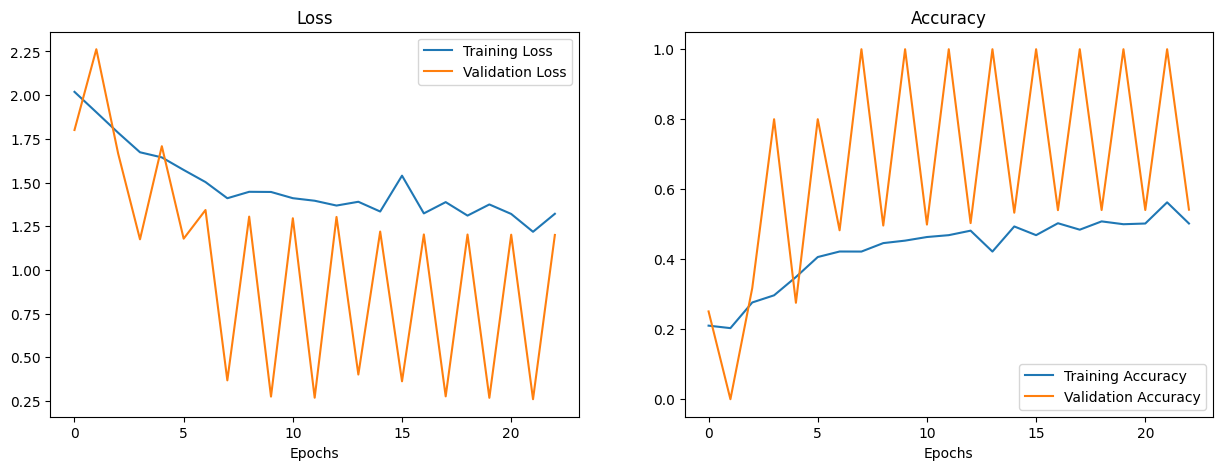

In [16]:
plot_curves(CNN_history)
#this

In [17]:
CNN_Predictions = CNN_Model.predict(test_data)

CNN_Predictions = np.argmax(CNN_Predictions, axis=1)
#this

113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step


In [18]:
test_data.class_indices
#this

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'Confusion Matrix')

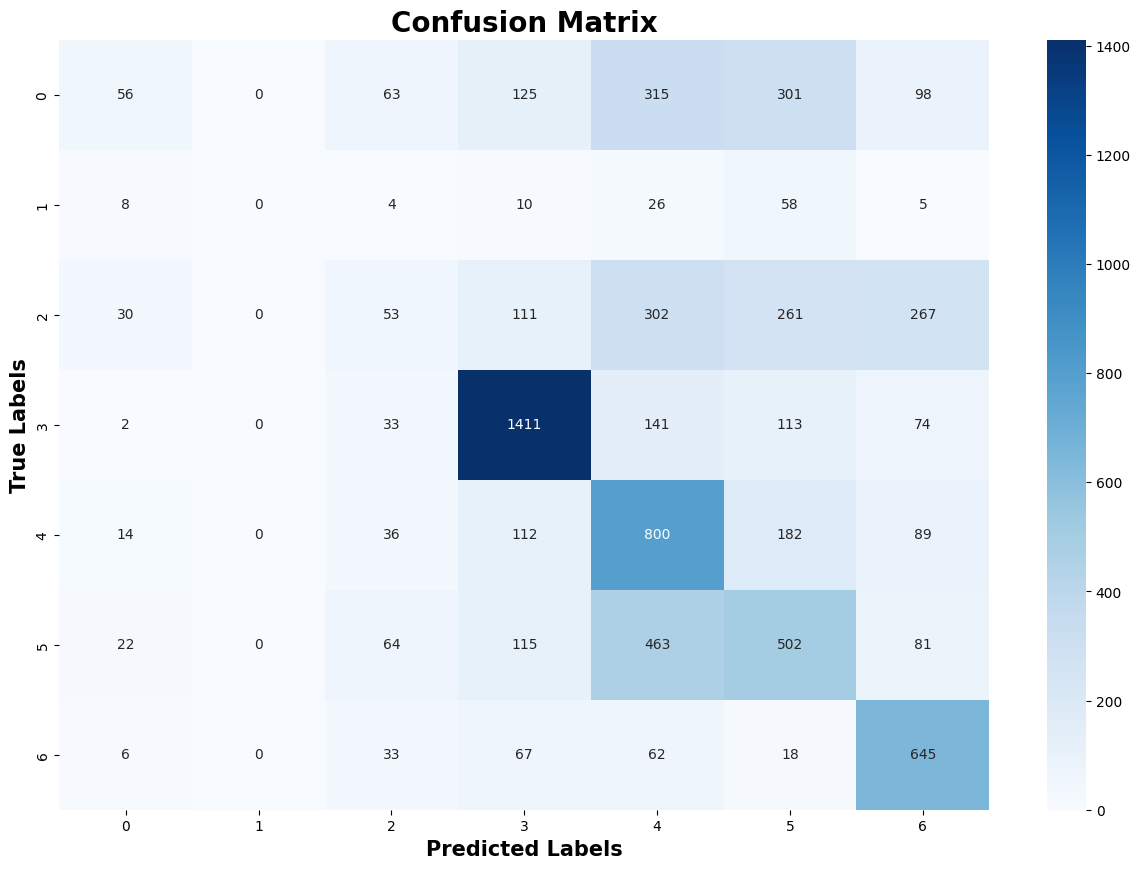

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(15, 10))

cm = confusion_matrix(test_data.classes, CNN_Predictions)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontsize=15, fontweight='bold')
ax.set_ylabel('True Labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')
#this

In [21]:
Emotion_Classes=['Angry',
                 'Disgust',
                 'Fear',
                 'Happy',
                 'Neutral',
                 'Sad',
                 'Surprise']

In [22]:
#shuffling test data to show different classes

test_preprocessor=ImageDataGenerator(rescale=1./255)

test_generator=test_preprocessor.flow_from_directory(
    test_data_path,
    target_size=(img_shape,img_shape),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

Found 7178 images belonging to 7 classes.


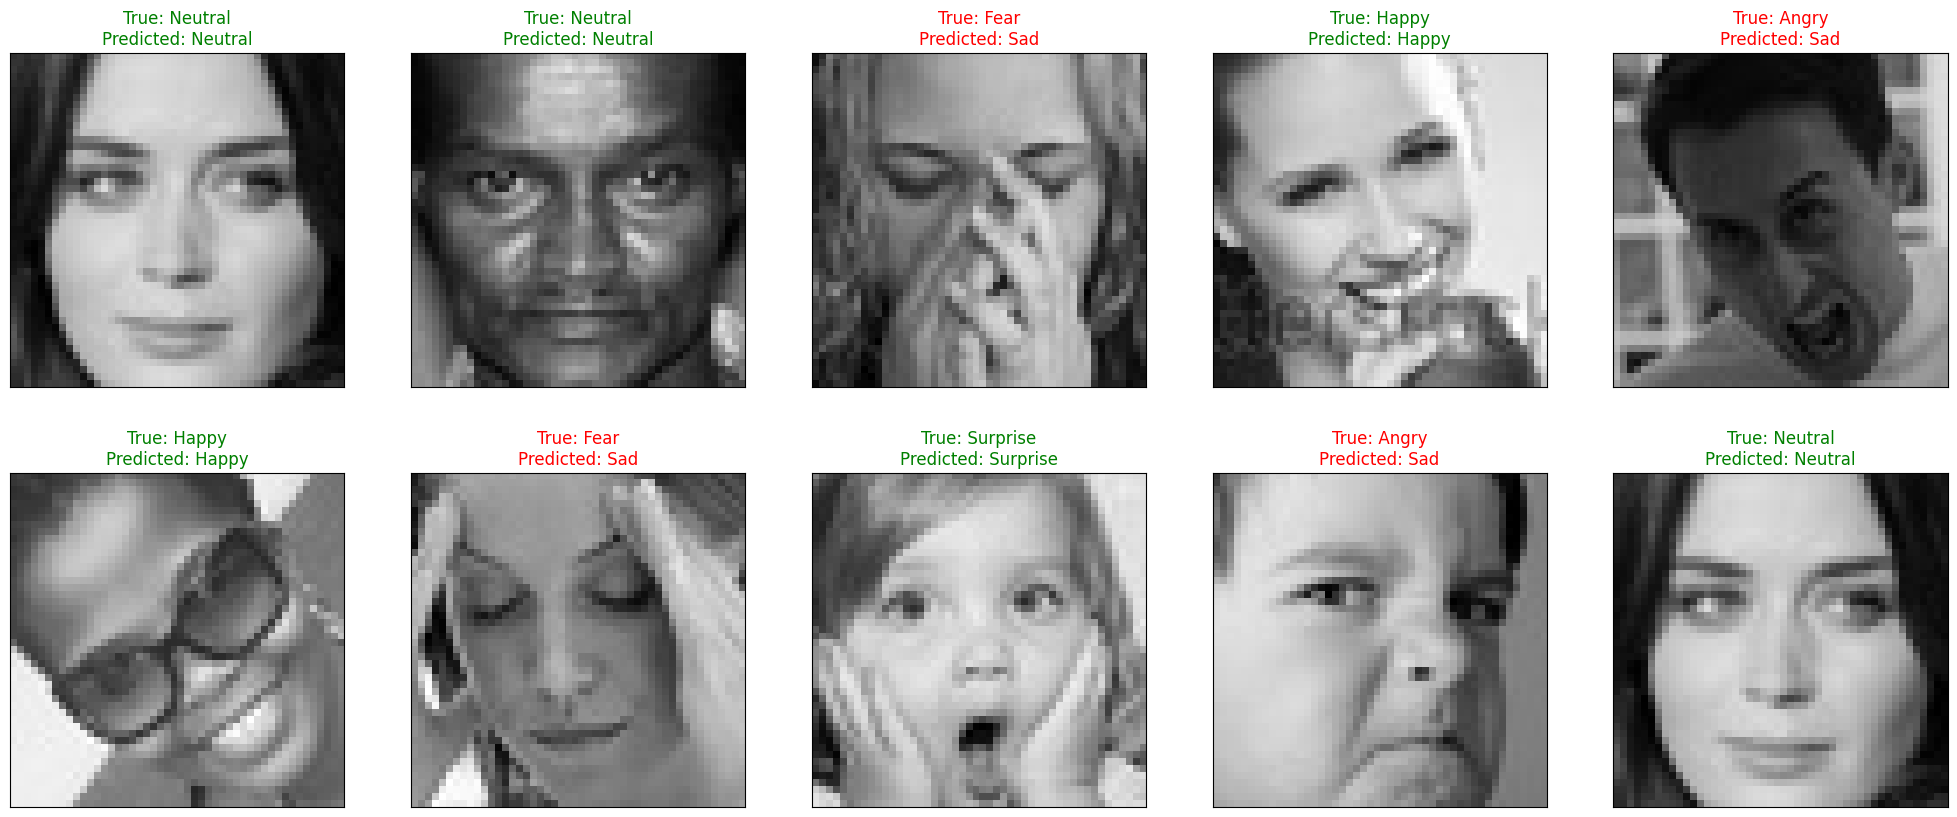

<Figure size 640x480 with 0 Axes>

In [23]:
#display 10 random pictures from dataset with their labels
Random_batch=np.random.randint(0,len(test_generator)-1)

Random_Img_Index=np.random.randint(0,batch_size-1,10)

fig, axes=plt.subplots(nrows=2,ncols=5,figsize=(25,10),
                       subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
  Random_Img=test_generator[Random_batch][0][Random_Img_Index[i]]

  Random_Img_Label=np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

  Model_Prediction=np.argmax(CNN_Model.predict(tf.expand_dims(Random_Img,axis=0), verbose=0))
  ax.imshow(Random_Img)

  if Emotion_Classes[Random_Img_Label]==Emotion_Classes[Model_Prediction]:
    color='green'
  else:
    color='red'
  ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}",color=color)

plt.show()
plt.tight_layout()

#this

In [26]:
Music_Player=pd.read_csv('data_moods.csv')
Music_Player=Music_Player[['name', 'artist', 'mood', 'popularity']]
Music_Player.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [27]:
Music_Player["mood"].value_counts()

mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64

In [28]:
Music_Player["popularity"].value_counts()

popularity
0     92
51    23
52    22
55    21
50    21
      ..
12     1
80     1
14     1
15     1
88     1
Name: count, Length: 83, dtype: int64

In [29]:
Play=Music_Player[Music_Player['mood']=='Calm']
Play=Play.sort_values(by="popularity",ascending=False)
Play=Play[:5].reset_index(drop=True)
display(Play)

,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Escaping Time,Benjamin Martins,Calm,60
2,Curiosity,Beau Projet,Calm,60
3,The Choice,Gustavo Santaolalla,Calm,59
4,alpha waves,Eucalyptic,Calm,59


In [48]:
#making song recommendation based on predicted class
def Recommend_Songs(pred_class):

  if (pred_class=='Disgust'):
      Play=Music_Player[Music_Player['mood']=='Sad']
      Play=Play.sort_values(by="popularity",ascending=False)
      Play=Play[:5].reset_index(drop=True)
      display(Play)

  if (pred_class=='Happy' or pred_class=='Sad'):
      Play=Music_Player[Music_Player['mood']=='Happy']
      Play=Play.sort_values(by="popularity",ascending=False)
      Play=Play[:5].reset_index(drop=True)
      display(Play)

  if (pred_class=='Fear' or pred_class=='Angry'):
      Play=Music_Player[Music_Player['mood']=='Calm']
      Play=Play.sort_values(by="popularity",ascending=False)
      Play=Play[:5].reset_index(drop=True)
      display(Play)

  if (pred_class=='Surprise' or pred_class=='Neutral'):
      Play=Music_Player[Music_Player['mood']=='Energetic']
      Play=Play.sort_values(by="popularity",ascending=False)
      Play=Play[:5].reset_index(drop=True)
      display(Play)

In [32]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

faceCascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
def load_and_prep_image(filename,img_shape=224):
  img=cv2.imread(filename)
  GrayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=faceCascade.detectMultiScale(GrayImg,1.1,4)
  for (x,y,w,h) in faces:
    roi_GrayImg=GrayImg[y:y+h,x:x+w]
    roi_Img=img[y:y+h,x:x+w]

    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

    faces=faceCascade.detectMultiScale(roi_GrayImg,1.1,4)

    if len(faces)==0:
      print("No Faces Detected")
    else:
      for (ex,ey,ew,eh) in faces:
        img=roi_Img[ey:ey+eh,ex:ex+ew]

  RGBImg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  RGBImg=cv2.resize(RGBImg,(img_shape,img_shape))
  RGBImg=RGBImg/255.

  return RGBImg

In [50]:
def pred_and_plot(filename,class_names):
  #import target image and preprocess it
  img=load_and_prep_image(filename)
  #make a prediction
  pred=ResNet50V2_Model.predict(np.expand_dims(img,axis=0))
  #get the predicted class
  pred_class=class_names[pred.argmax()]
  #plot the image and predicted class
  #plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  Recommend_Songs(pred_class)

In [51]:
pred_and_plot("test/disgust/PrivateTest_807646.jpg",Emotion_Classes) #with CNN

NameError: name 'ResNet50V2_Model' is not defined

RESNET

In [53]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64
train_data_path = 'train/'
test_data_path = 'test/'

In [54]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)

test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [55]:
# 224,224,3
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

#ResNet50V2.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [56]:
# Freezing all layers except last 50

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False

In [57]:
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model

In [58]:
ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,996,295 (114.43 MB)

 Trainable params: 22,779,527 (86.90 MB)

 Non-trainable params: 7,216,768 (27.53 MB)

In [60]:
# Create Callback Checkpoint
checkpoint_path = "ResNet50V2_Model_Checkpoint.keras"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.00005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [61]:
ResNet50V2_history = ResNet50V2_Model.fit(train_data ,validation_data = test_data , epochs=30, batch_size=batch_size,
                                         callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 4301s 10s/step - accuracy: 0.4002 - loss: 1.8389 - val_accuracy: 0.5336 - val_loss: 1.4536 - learning_rate: 0.0010
Epoch 2/30
  1/448 ━━━━━━━━━━━━━━━━━━━━ 33:20 4s/step - accuracy: 0.4062 - loss: 1.7681

c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4062 - loss: 1.7681 - val_accuracy: 1.0000 - val_loss: 0.3477 - learning_rate: 0.0010
Epoch 3/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 2190s 5s/step - accuracy: 0.5425 - loss: 1.2697 - val_accuracy: 0.5604 - val_loss: 1.5772 - learning_rate: 0.0010
Epoch 4/30
  1/448 ━━━━━━━━━━━━━━━━━━━━ 29:36 4s/step - accuracy: 0.5469 - loss: 1.4893
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 857us/step - accuracy: 0.5469 - loss: 1.4893 - val_accuracy: 0.7000 - val_loss: 0.8927 - learning_rate: 0.0010
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 2152s 5s/step - accuracy: 0.6021 - loss: 1.1094 - val_accuracy: 0.6267 - val_loss: 1.0246 - learning_rate: 2.0000e-04
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 824us/step - accuracy: 0.6250 - loss: 1.2023 - val_accuracy: 1.0000 - val_loss: 0.2488 - learning_rate: 2.0000e-04
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 2212s 5s/step - accuracy: 0.6279 - loss: 

In [62]:
ResNet50V2_Score = ResNet50V2_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(ResNet50V2_Score[0]))
print("Test Accuracy: {:.2f}%".format(ResNet50V2_Score[1] * 100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.4125 - loss: 1.6788
    Test Loss: 1.43071
Test Accuracy: 53.34%


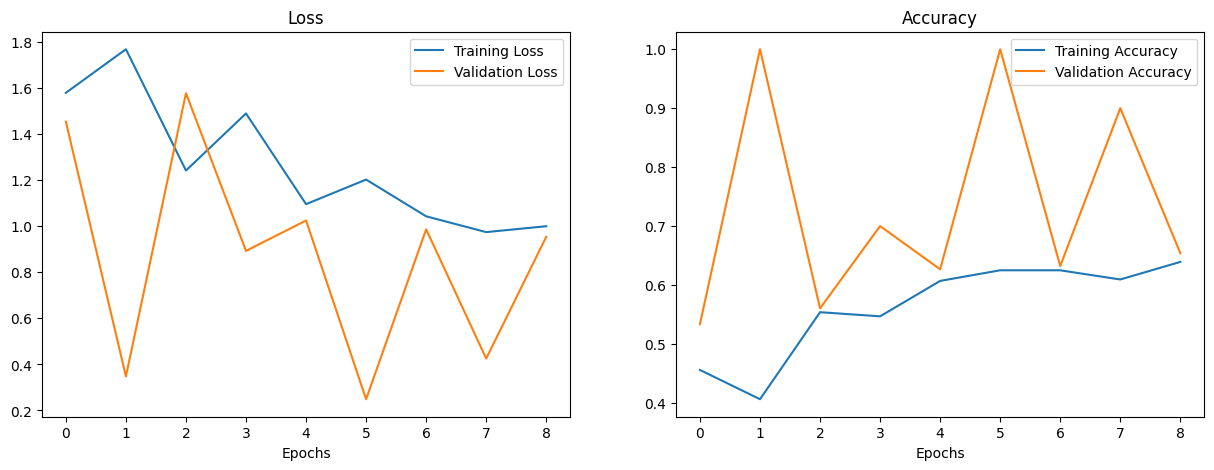

In [63]:
plot_curves(ResNet50V2_history)

In [64]:
ResNet50V2_Predictions = ResNet50V2_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction 
ResNet50V2_Predictions = np.argmax(ResNet50V2_Predictions, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step


Text(0.5, 1.0, 'ResNet50V2 Confusion Matrix')

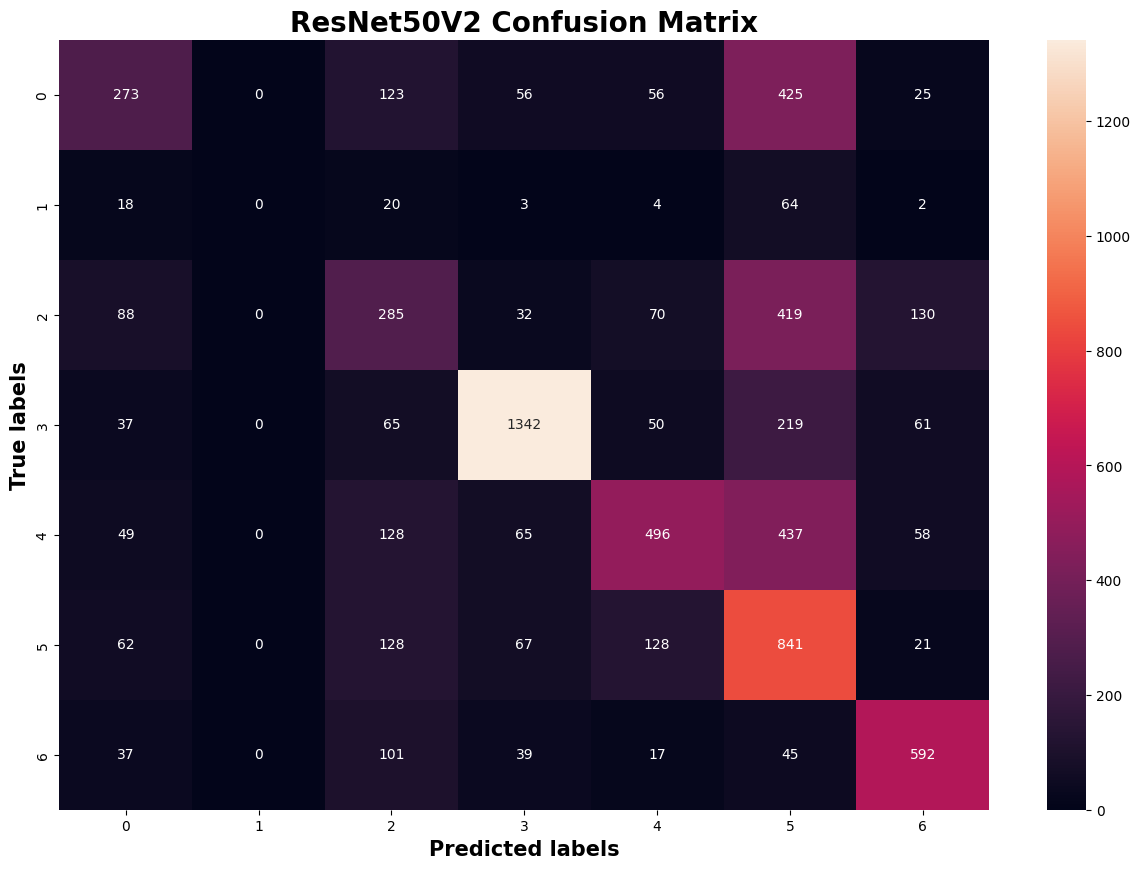

In [65]:
fig , ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, ResNet50V2_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('ResNet50V2 Confusion Matrix', fontsize=20, fontweight='bold')

In [67]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [68]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 7178 images belonging to 7 classes.


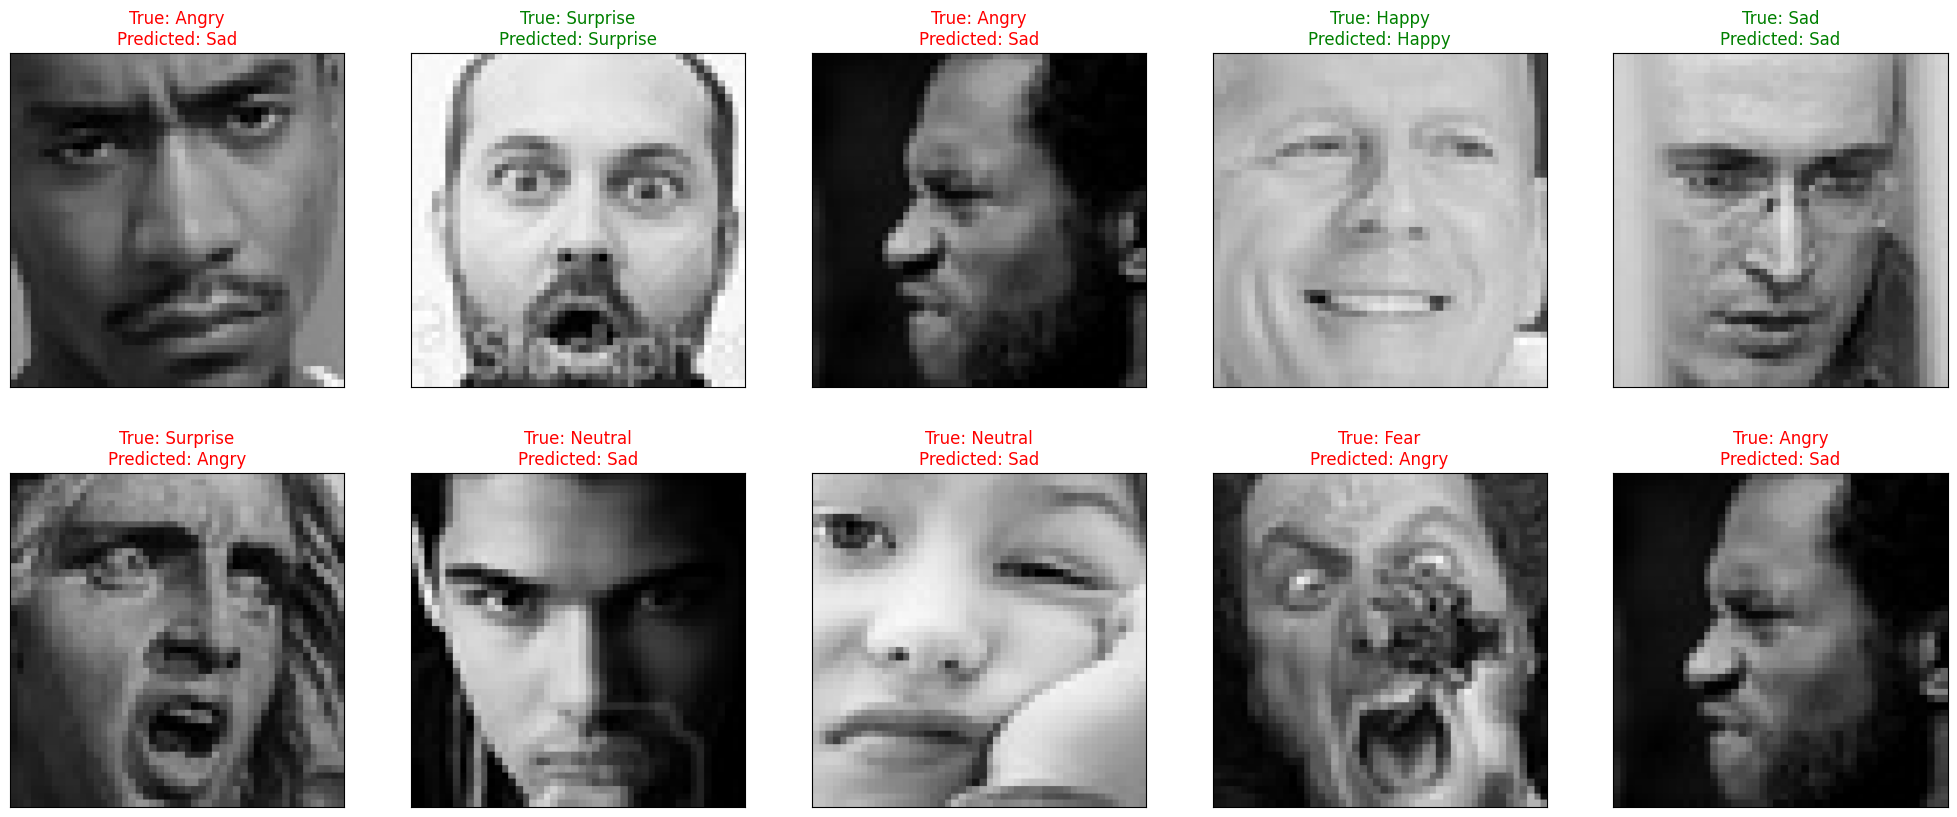

<Figure size 640x480 with 0 Axes>

In [69]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(ResNet50V2_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

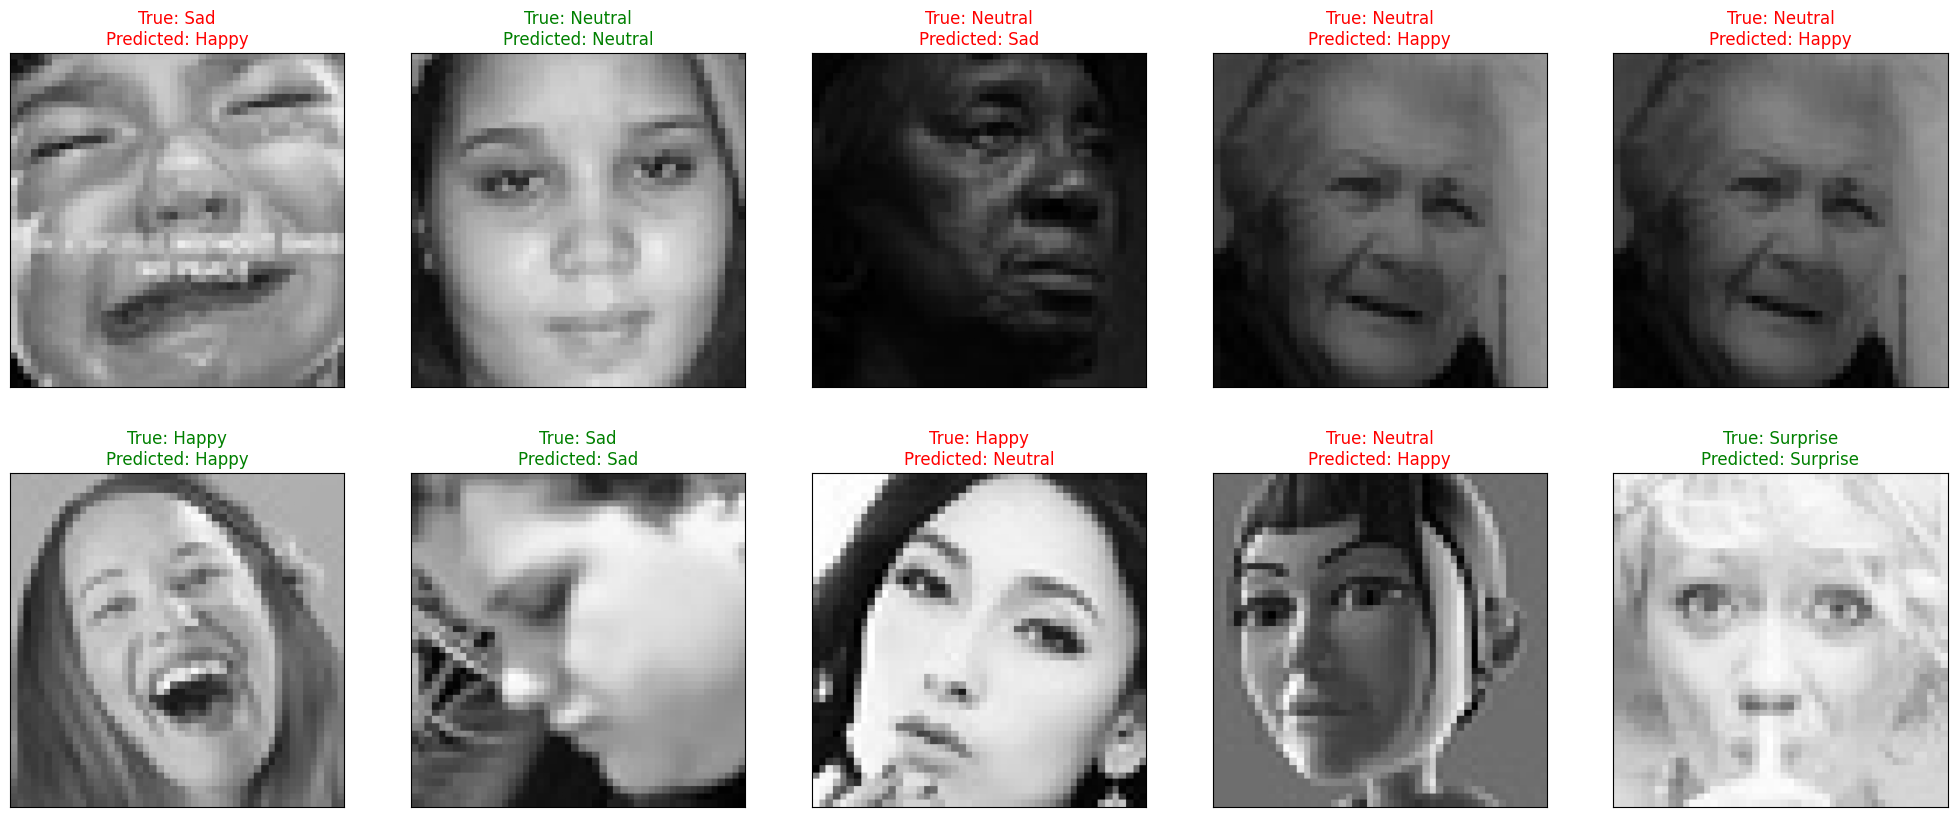

<Figure size 640x480 with 0 Axes>

In [70]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(ResNet50V2_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

In [72]:
Music_Player=pd.read_csv('data_moods.csv')
Music_Player=Music_Player[['name', 'artist', 'mood', 'popularity']]
Music_Player.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [73]:
Music_Player["mood"].value_counts()

mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64

In [74]:
Music_Player["popularity"].value_counts()

popularity
0     92
51    23
52    22
55    21
50    21
      ..
12     1
80     1
14     1
15     1
88     1
Name: count, Length: 83, dtype: int64

In [75]:
Play=Music_Player[Music_Player['mood']=='Calm']
Play=Play.sort_values(by="popularity",ascending=False)
Play=Play[:5].reset_index(drop=True)
display(Play)

,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Escaping Time,Benjamin Martins,Calm,60
2,Curiosity,Beau Projet,Calm,60
3,The Choice,Gustavo Santaolalla,Calm,59
4,alpha waves,Eucalyptic,Calm,59


In [76]:
#making song recommendation based on predicted class
def Recommend_Songs(pred_class):

  if (pred_class=='Disgust'):
      Play=Music_Player[Music_Player['mood']=='Sad']
      Play=Play.sort_values(by="popularity",ascending=False)
      Play=Play[:5].reset_index(drop=True)
      display(Play)

  if (pred_class=='Happy' or pred_class=='Sad'):
      Play=Music_Player[Music_Player['mood']=='Happy']
      Play=Play.sort_values(by="popularity",ascending=False)
      Play=Play[:5].reset_index(drop=True)
      display(Play)

  if (pred_class=='Fear' or pred_class=='Angry'):
      Play=Music_Player[Music_Player['mood']=='Calm']
      Play=Play.sort_values(by="popularity",ascending=False)
      Play=Play[:5].reset_index(drop=True)
      display(Play)

  if (pred_class=='Surprise' or pred_class=='Neutral'):
      Play=Music_Player[Music_Player['mood']=='Energetic']
      Play=Play.sort_values(by="popularity",ascending=False)
      Play=Play[:5].reset_index(drop=True)
      display(Play)

In [77]:
#!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

faceCascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [78]:
def load_and_prep_image(filename,img_shape=224):
  img=cv2.imread(filename)
  GrayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=faceCascade.detectMultiScale(GrayImg,1.1,4)
  for (x,y,w,h) in faces:
    roi_GrayImg=GrayImg[y:y+h,x:x+w]
    roi_Img=img[y:y+h,x:x+w]

    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

    faces=faceCascade.detectMultiScale(roi_GrayImg,1.1,4)

    if len(faces)==0:
      print("No Faces Detected")
    else:
      for (ex,ey,ew,eh) in faces:
        img=roi_Img[ey:ey+eh,ex:ex+ew]

  RGBImg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  RGBImg=cv2.resize(RGBImg,(img_shape,img_shape))
  RGBImg=RGBImg/255.

  return RGBImg

In [79]:
def pred_and_plot(filename,class_names):
  #import target image and preprocess it
  img=load_and_prep_image(filename)
  #make a prediction
  pred=ResNet50V2_Model.predict(np.expand_dims(img,axis=0))
  #get the predicted class
  pred_class=class_names[pred.argmax()]
  #plot the image and predicted class
  #plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  Recommend_Songs(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


,name,artist,mood,popularity
0,Chop Suey!,System Of A Down,Energetic,79
1,Killing In The Name,Rage Against The Machine,Energetic,78
2,Dani California,Red Hot Chili Peppers,Energetic,77
3,Duality,Slipknot,Energetic,76
4,Uprising,Muse,Energetic,75


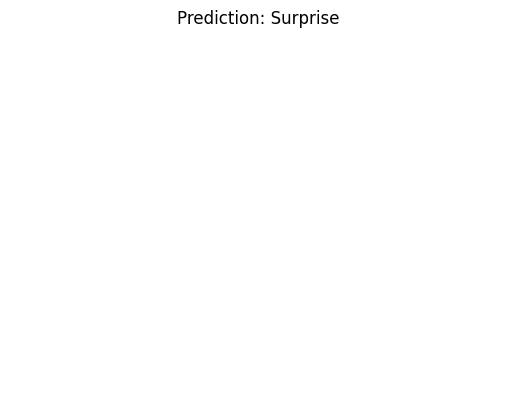

In [83]:
pred_and_plot("test/surprise/PrivateTest_1673508.jpg",Emotion_Classes) #with CNN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


,name,artist,mood,popularity
0,Chop Suey!,System Of A Down,Energetic,79
1,Killing In The Name,Rage Against The Machine,Energetic,78
2,Dani California,Red Hot Chili Peppers,Energetic,77
3,Duality,Slipknot,Energetic,76
4,Uprising,Muse,Energetic,75


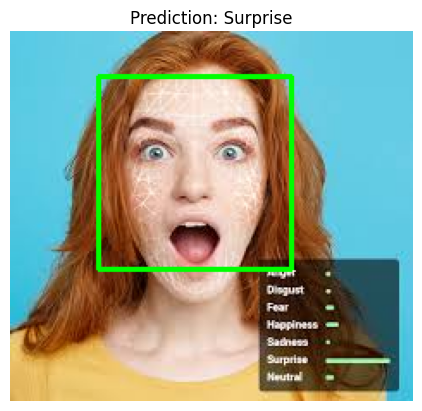

In [88]:
pred_and_plot("download.jpg",Emotion_Classes) #with CNN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


,name,artist,mood,popularity
0,Africa,TOTO,Happy,84
1,Take on Me,a-ha,Happy,84
2,Pumped Up Kicks,Foster The People,Happy,84
3,Highway to Hell,AC/DC,Happy,83
4,Here Comes The Sun - Remastered 2009,The Beatles,Happy,83


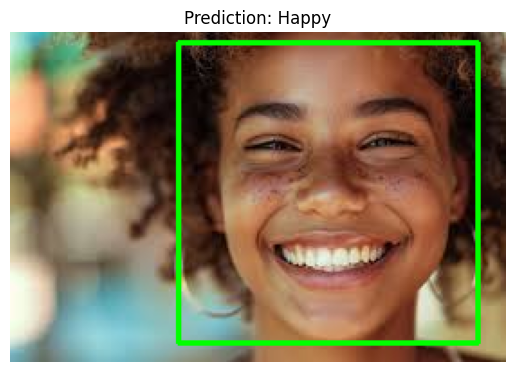

In [86]:
pred_and_plot("images.jpg",Emotion_Classes) #with Resnet50V2

In [89]:
CNN_Model.save('CNN_Model.h5')
ResNet50V2_Model.save('ResNet50V2_Model.h5')

In [10]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
import pathlib
import datetime



# printout versions
%pip install tensorflow-addons
print(f"Tensorflow version: {tf.__version__}")
print(f"Numpy version: {np.version.version}")

Note: you may need to restart the kernel to use updated packages.
Tensorflow version: 2.18.0
Numpy version: 2.0.2


ERROR: Could not find a version that satisfies the requirement tensorflow-addons (from versions: none)
ERROR: No matching distribution found for tensorflow-addons

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
data_train_dir = pathlib.Path("train/")
data_test_dir = pathlib.Path("test/")
image_count = len(list(data_train_dir.glob('*/*.png')))
BATCH_SIZE = 32             
IMG_HEIGHT = 227            
IMG_WIDTH = 227             
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
print("Training Data count:" + str(image_count))

class_names = np.array([item.name for item in data_train_dir.glob('*') if item.name != ".DS_Store"])
print("Class Names:\n" + str(class_names))
class_count = len(class_names)
print("Class Count:\n" + str(class_count))

Training Data count:0
Class Names:
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Class Count:
7


In [12]:
model = tf.keras.models.Sequential([
  # Conv Layer 1
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
  # Conv Layer 2
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 3
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 4
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 5
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # Flattern after Conv layers
  tf.keras.layers.Flatten(),
  # FC1
  tf.keras.layers.Dense(4096, activation='relu'),
  #tf.keras.layers.Dropout(0.5),
  # FC2
  tf.keras.layers.Dense(4096, activation='relu'),
  #tf.keras.layers.Dropout(0.5),
  # FC3 classifier  
  tf.keras.layers.Dense(class_count, activation='sigmoid')
])

c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# normalize images to [0-1] interval
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# training_data for model training
train_data_generator = image_generator.flow_from_directory(directory=str(data_train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                     classes = list(class_names))

test_data_generator = image_generator.flow_from_directory(directory=str(data_test_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                     classes = list(class_names))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 27, 27, 256)    │     2,973,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 27, 27, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 27, 27, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 27, 27, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 27, 27, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 27, 27, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4096)           │   177,213,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 7)              │        28,679 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,135,431 (763.46 MB)

 Trainable params: 200,132,679 (763.45 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [15]:
import time
start = time.time()
history = model.fit(train_data_generator, steps_per_epoch=STEPS_PER_EPOCH, 
                    epochs=20, validation_data=test_data_generator)

# Saving the model
model.save('AlexNet_FER_Model_20Epoch/')
print("Total time: ", time.time() - start, "seconds")

c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
  8/898 ━━━━━━━━━━━━━━━━━━━━ 1:42:06 7s/step - accuracy: 0.1197 - auc: 0.5526 - loss: 78.1549 - precision: 0.1609 - recall: 0.6783 - sensitivity_at_specificity: 0.5565 - specificity_at_sensitivity: 0.5747

KeyboardInterrupt: 

In [ ]:
def plot_result(history):
    plt.plot(history.history["val_accuracy"],color='green')
    plt.plot(history.history["accuracy"],color='olive')
    plt.plot(history.history["precision_2"],color='violet')
    plt.plot(history.history["val_precision_2"],color='purple')
    plt.plot(history.history["recall_2"],color='cyan')
    plt.plot(history.history["val_recall_2"],color='yellow')
    plt.title("Metrics")
    
    plt.legend(["Test Accuracy", "Train Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall" ], bbox_to_anchor =(0.65, 1.00))
    plt.show()

plot_result(history)

In [ ]:
model_2 = tf.keras.models.Sequential([
  # Conv Layer 1
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
  # Conv Layer 2
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 3
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 4
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 5
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # Flattern after Conv layers
  tf.keras.layers.Flatten(),
  # FC1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # FC2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # FC3 classifier  
  tf.keras.layers.Dense(class_count, activation='sigmoid')
])

In [ ]:
model_2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])
model_2.summary()

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import altair as alt

import numpy as np
import pandas as pd

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.2326 - loss: 1.8339 - val_accuracy: 0.2471 - val_loss: 1.8205 - learning_rate: 0.0010
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2353 - loss: 1.8293 - val_accuracy: 0.2471 - val_loss: 1.8197 - learning_rate: 0.0010
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.2403 - loss: 1.8218 - val_accuracy: 0.2471 - val_loss: 1.8192 - learning_rate: 0.0010
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.2527 - loss: 1.8168 - val_accuracy: 0.2471 - val_loss: 1.8157 - learning_rate: 0.0010
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.2492 - loss: 1.8134 - val_accuracy: 0.2471 - val_loss: 1.8137 - learning_rate: 0.0010
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.2453 - loss: 1.8175 - val_accuracy: 0.2471 - val_loss: 1.8189 - learning_rate: 0.0010
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2503

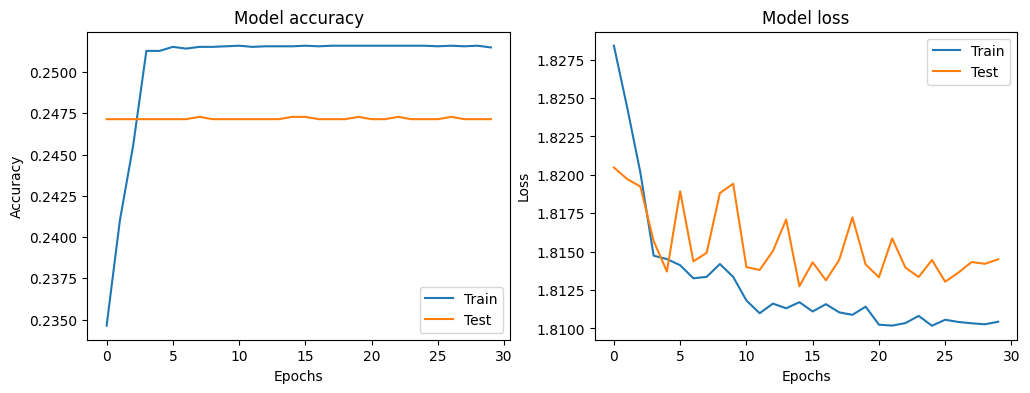

In [7]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

# Path to your FER2013 dataset (make sure to update it based on your folder structure)
train_dir = 'train/'
test_dir = 'test/'

# Set parameters
img_width, img_height = 48, 48
num_classes = 7  # FER2013 dataset has 7 emotion classes
batch_size = 64
epochs = 30

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.2,    # Shift images horizontally
    height_shift_range=0.2,   # Shift images vertically
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill in new pixels after transformations
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# LeNet-5 Model Architecture (Modified)
model = Sequential()

# First Convolutional Layer with more filters
model.add(Conv2D(32, kernel_size=(5, 5), activation='tanh', input_shape=(img_width, img_height, 3)))
model.add(AveragePooling2D(pool_size=(2, 2)))

# Second Convolutional Layer with more filters
model.add(Conv2D(64, kernel_size=(5, 5), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))  # 7 output classes

# Compile the model with Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Learning Rate Scheduler to reduce the learning rate after each epoch
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.5  # Reduces learning rate by 50% every 10 epochs
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1,
    callbacks=[lr_callback]
)

# Evaluate the model on the test set
score = model.evaluate(test_generator, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

plt.show()


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 44, 44, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 22, 22, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 18, 18, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 9, 9, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       155,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,971 (660.04 KB)

 Trainable params: 168,971 (660.04 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.1428 - loss: 2.0494 - val_accuracy: 0.1427 - val_loss: 2.0341
Epoch 2/12
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.1453 - loss: 2.0239 - val_accuracy: 0.1427 - val_loss: 2.0117
Epoch 3/12
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.1431 - loss: 2.0045 - val_accuracy: 0.1427 - val_loss: 1.9902
Epoch 4/12
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.1415 - loss: 1.9838 - val_accuracy: 0.1427 - val_loss: 1.9700
Epoch 5/12
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.1403 - loss: 1.9649 - val_accuracy: 0.1427 - val_loss: 1.9512
Epoch 6/12
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.1419 - loss: 1.9462 - val_accuracy: 0.1427 - val_loss: 1.9338
Epoch 7/12
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.1411 - loss: 1.9297 - val_accuracy: 0.1427 - val_loss: 1.9182
Epoch 8/12
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.1410 - loss: 1.9135 -

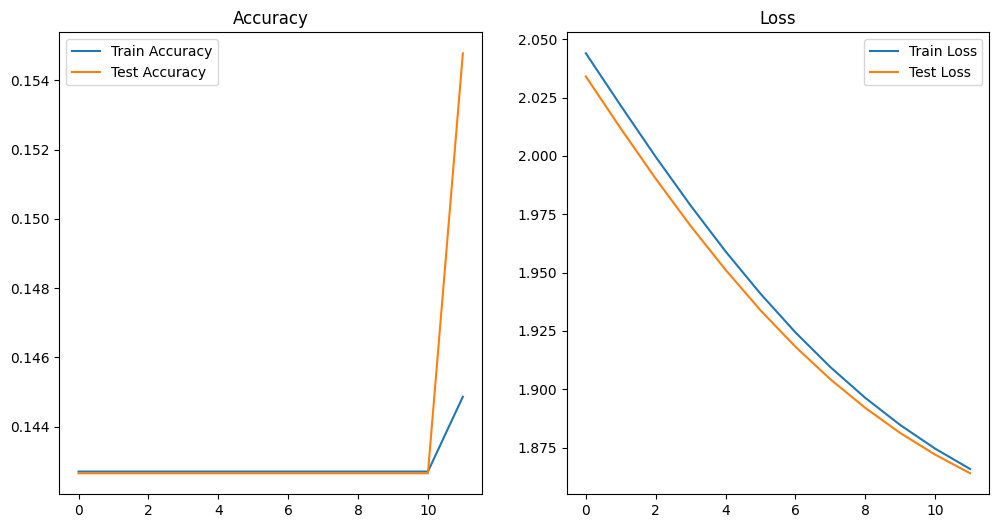

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Directory paths
train_dir = 'train/'  # Adjust to your path
test_dir = 'test/'    # Adjust to your path

# Image dimensions
img_width, img_height = 48, 48

# ImageDataGenerator for data loading and augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize the images
test_datagen = ImageDataGenerator(rescale=1./255)



# Load training and test data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=128,
    class_mode='categorical',  # Multi-class classification
    color_mode='grayscale'     # Images are grayscale
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=128,
    class_mode='categorical',
    color_mode='grayscale'
)

# Number of classes in the FER2013 dataset (7 emotions)
num_classes = 7

# LeNet-5 model architecture for FER2013 dataset
model = Sequential()

# Add 1st convolutional layer with:
# - 6 feature maps, 5x5 kernel, tanh activation
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(img_width, img_height, 1)))

# Add 1st pooling layer with 2x2 pool size
model.add(AveragePooling2D(pool_size=(2, 2)))

# Add 2nd convolutional layer with:
# - 16 feature maps, 5x5 kernel, tanh activation
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))

# Add 2nd pooling layer with 2x2 pool size
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
model.add(Flatten())

# Add fully connected layer with 120 units and sigmoid activation
model.add(Dense(120, activation='sigmoid'))

# Add another fully connected layer with 84 units and sigmoid activation
model.add(Dense(84, activation='sigmoid'))

# Add output layer with 7 units (one for each emotion) and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
epochs = 12
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1
)

# Evaluate the model on test data
score = model.evaluate(test_generator, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Visualize the training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.legend()

plt.show()


LENET-5 model

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.2079 - loss: 6.5593

c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 68s 147ms/step - accuracy: 0.2079 - loss: 6.5583 - val_accuracy: 0.2462 - val_loss: 5.3165 - learning_rate: 1.0000e-04
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.2320 - loss: 4.9742 - val_accuracy: 0.2534 - val_loss: 4.0125 - learning_rate: 1.0000e-04
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 56s 124ms/step - accuracy: 0.2475 - loss: 3.7908 - val_accuracy: 0.2559 - val_loss: 3.1209 - learning_rate: 1.0000e-04
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 192s 427ms/step - accuracy: 0.2517 - loss: 2.9832 - val_accuracy: 0.2735 - val_loss: 2.5385 - learning_rate: 1.0000e-04
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.2565 - loss: 2.4791 - val_accuracy: 0.2898 - val_loss: 2.2015 - learning_rate: 1.0000e-04
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 54s 120ms/step - accuracy: 0.2656 - loss: 2.1840 - val_accuracy: 0.3111 - val_loss: 1.9950 - learning_rate: 1.0000e-04
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 54s 120ms/step -

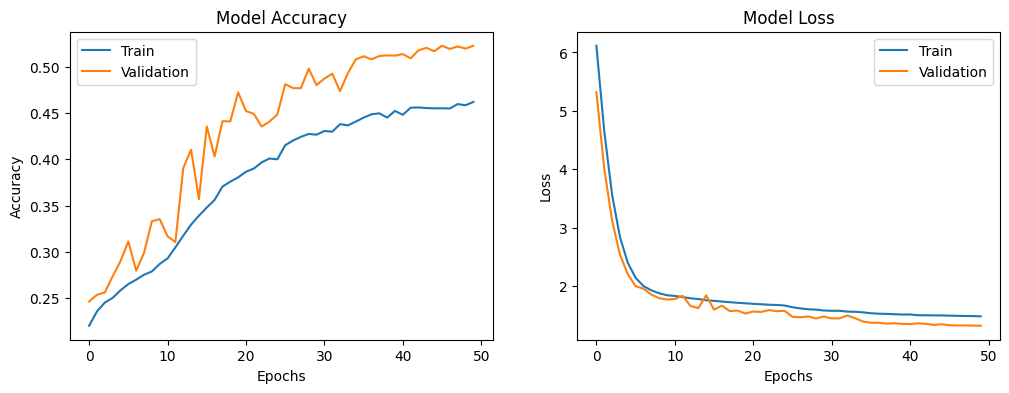

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Path to FER2013 dataset (update paths based on your folder structure)
train_dir = 'train/'
test_dir = 'test/'

# Parameters
img_width, img_height = 48, 48
num_classes = 7
batch_size = 64
epochs = 50

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Data Loading
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# LeNet-5 Model Architecture (Modified)
model = Sequential()

# First Convolutional Layer with ReLU and BatchNormalization
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer with ReLU and BatchNormalization
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers with L2 Regularization
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)

# Evaluate the Model
score = model.evaluate(valid_generator, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


Found 7178 images belonging to 7 classes.


c:\Users\arkak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


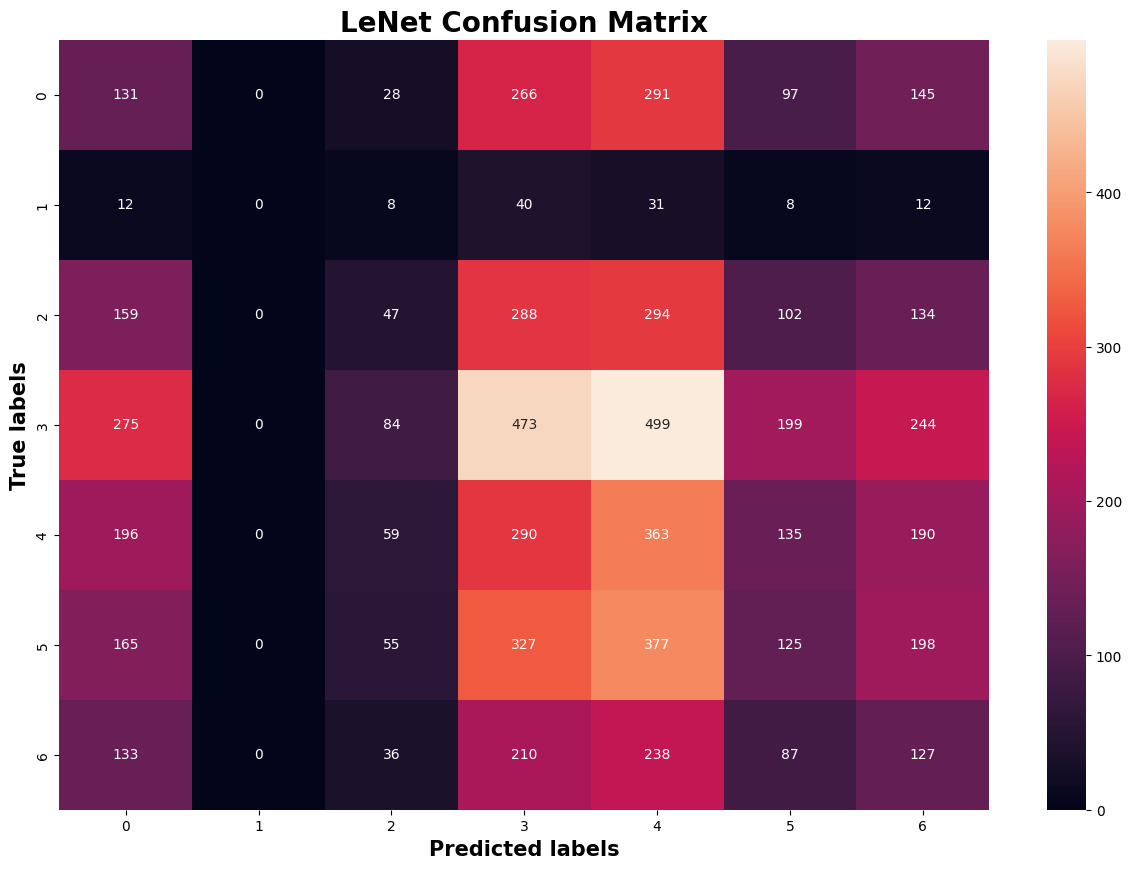

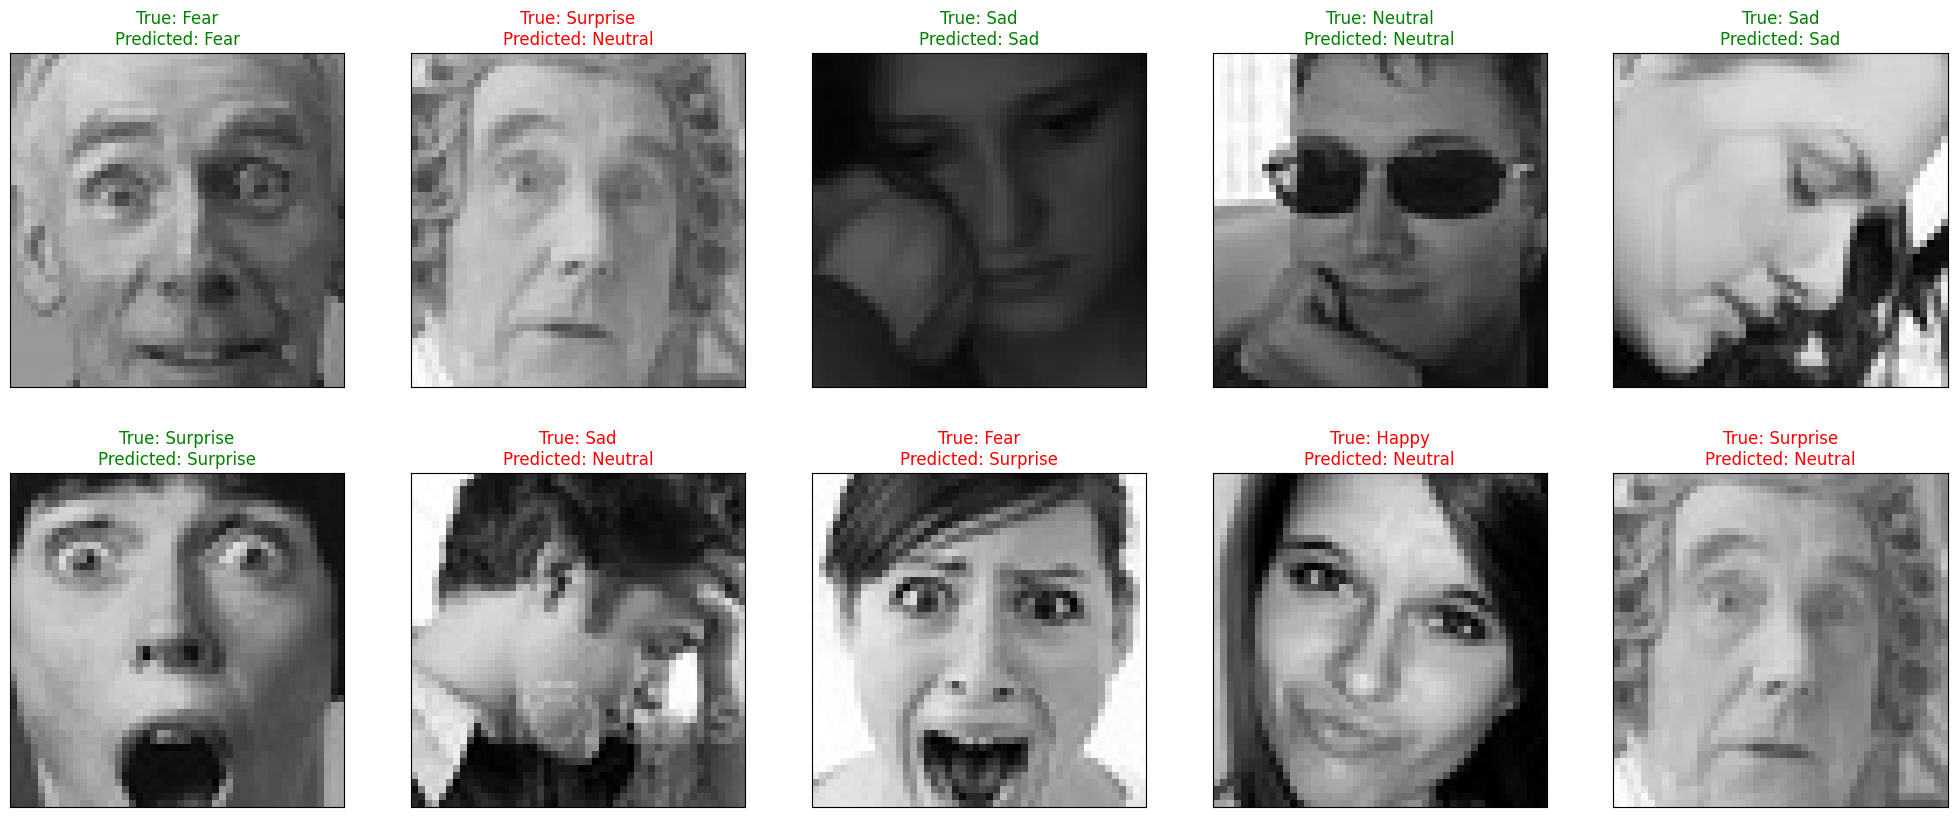

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns  # Importing Seaborn for heatmap
import tensorflow as tf  # Importing TensorFlow for expand_dims
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix  # Importing confusion_matrix

# Define the path to your test data directory
test_data_path = 'test/'  # Make sure this path points to the correct test data folder

# Parameters for image size and batch size
img_width, img_height = 48, 48
batch_size = 64

# Shuffling Test Data to show different classes
test_preprocessor = ImageDataGenerator(
    rescale=1 / 255.,  # Normalizing image values
)

# Load the test data using the correct path
test_generator = test_preprocessor.flow_from_directory(
    test_data_path,  # Use the correct path to the test data folder
    class_mode="categorical",
    target_size=(img_width, img_height),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

# Making Predictions
LeNet_Predictions = model.predict(test_generator, verbose=0)

# Choosing highest probability class in every prediction 
LeNet_Predictions = np.argmax(LeNet_Predictions, axis=1)

# Confusion Matrix Plot
fig , ax = plt.subplots(figsize=(15, 10))

cm = confusion_matrix(test_generator.classes, LeNet_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels', fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('LeNet Confusion Matrix', fontsize=20, fontweight='bold')

Emotion_Classes = ['Angry', 
                   'Disgust', 
                   'Fear', 
                   'Happy', 
                   'Neutral', 
                   'Sad', 
                   'Surprise']

# Display 10 random pictures from the dataset with their labels
Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.show()
plt.tight_layout()


No Faces Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
C:\Users\arkak\AppData\Local\Temp\ipykernel_9616\2939199730.py:88: SyntaxWarning: invalid escape sequence '\s'
  pred_and_plot("test\sad\PrivateTest_5341847.jpg", Emotion_Classes)  # with LeNet


,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Escaping Time,Benjamin Martins,Calm,60
2,Curiosity,Beau Projet,Calm,60
3,The Choice,Gustavo Santaolalla,Calm,59
4,alpha waves,Eucalyptic,Calm,59


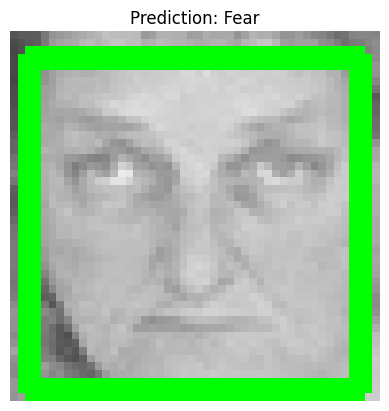

In [41]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming LeNet model is already loaded and trained
# Load the dataset
Music_Player = pd.read_csv('data_moods.csv')
Music_Player = Music_Player[['name', 'artist', 'mood', 'popularity']]
Music_Player.head()

Music_Player["mood"].value_counts()
Music_Player["popularity"].value_counts()

# Function to display top songs based on mood and popularity
def Recommend_Songs(pred_class):
    if (pred_class == 'Disgust'):
        Play = Music_Player[Music_Player['mood'] == 'Sad']
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    elif (pred_class == 'Happy' or pred_class == 'Sad'):
        Play = Music_Player[Music_Player['mood'] == 'Happy']
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    elif (pred_class == 'Fear' or pred_class == 'Angry'):
        Play = Music_Player[Music_Player['mood'] == 'Calm']
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    elif (pred_class == 'Surprise' or pred_class == 'Neutral'):
        Play = Music_Player[Music_Player['mood'] == 'Energetic']
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

# Load and preprocess the image for LeNet model
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def load_and_prep_image(filename, img_shape=48):
    img = cv2.imread(filename)
    GrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)
    
    for (x, y, w, h) in faces:
        roi_GrayImg = GrayImg[y:y + h, x:x + w]
        roi_Img = img[y:y + h, x:x + w]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        faces = faceCascade.detectMultiScale(roi_GrayImg, 1.1, 4)
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ey:ey + eh, ex:ex + ew]
    
    RGBImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGBImg = cv2.resize(RGBImg, (img_shape, img_shape))
    RGBImg = RGBImg / 255.0

    return RGBImg

# Predict class and make song recommendation using the LeNet model
def pred_and_plot(filename, class_names):
    # Import target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction using the trained LeNet model
    pred = model.predict(np.expand_dims(img, axis=0))  # Use your trained LeNet model here
    
    # Get the predicted class
    pred_class = class_names[pred.argmax()]
    
    # Plot the image and predicted class
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    Recommend_Songs(pred_class)

# Define Emotion Classes corresponding to your dataset
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Test the model and make song recommendations
pred_and_plot("test\sad\PrivateTest_5341847.jpg", Emotion_Classes)  # with LeNet
#pred_and_plot("uploads\download (1).jpg", Emotion_Classes)  # with LeNet


In [42]:
model.save('lenet_model.h5')  # Saves as a single .h5 file


Alexnet Model

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.2397 - loss: 1.8340 - val_accuracy: 0.2474 - val_loss: 1.8085 - learning_rate: 1.0000e-04
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 517s 1s/step - accuracy: 0.2570 - loss: 1.7970 - val_accuracy: 0.2308 - val_loss: 1.8230 - learning_rate: 1.0000e-04
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 548s 1s/step - accuracy: 0.2519 - loss: 1.7901 - val_accuracy: 0.2997 - val_loss: 1.7284 - learning_rate: 1.0000e-04
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 539s 1s/step - accuracy: 0.2691 - loss: 1.7698 - val_accuracy: 0.3065 - val_loss: 1.6916 - learning_rate: 1.0000e-04
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 540s 1s/step - accuracy: 0.2869 - loss: 1.7422 - val_accuracy: 0.3578 - val_loss: 1.6219 - learning_rate: 1.0000e-04
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.3159 - loss: 1.6805 - val_accuracy: 0.4202 - val_loss: 1.4977 -

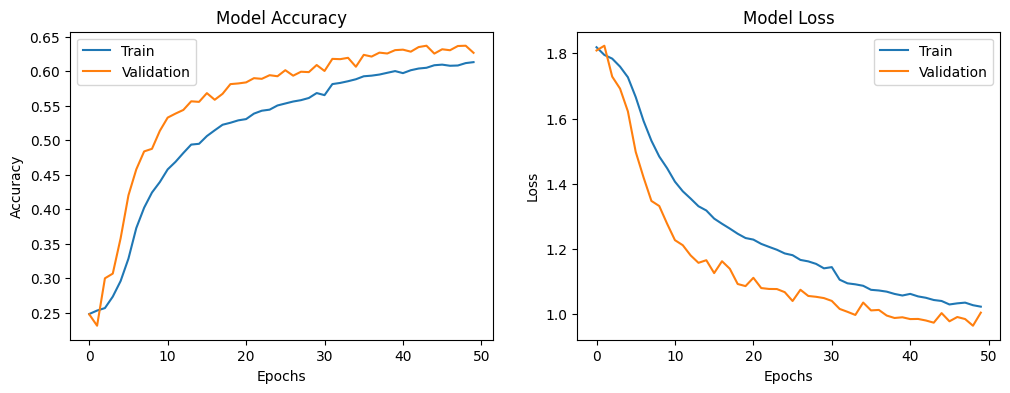

In [44]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Path to FER2013 dataset (update paths based on your folder structure)
train_dir = 'train/'  # Update this path as needed
test_dir = 'test/'    # Update this path as needed

# Parameters
img_width, img_height = 64, 64  # Increased image size to avoid small feature maps
num_classes = 7
batch_size = 64
epochs = 50

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Data Loading
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# AlexNet Model Architecture
alexnet = Sequential()

# First Convolutional Layer
alexnet.add(Conv2D(96, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(img_width, img_height, 3)))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
alexnet.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
alexnet.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth and Fifth Convolutional Layers
alexnet.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
alexnet.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

# Flatten and Fully Connected Layers
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(num_classes, activation='softmax'))

# Compile the Model
alexnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
history = alexnet.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)

# Evaluate the Model
score = alexnet.evaluate(valid_generator, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 30s 265ms/step
Found 7178 images belonging to 7 classes.


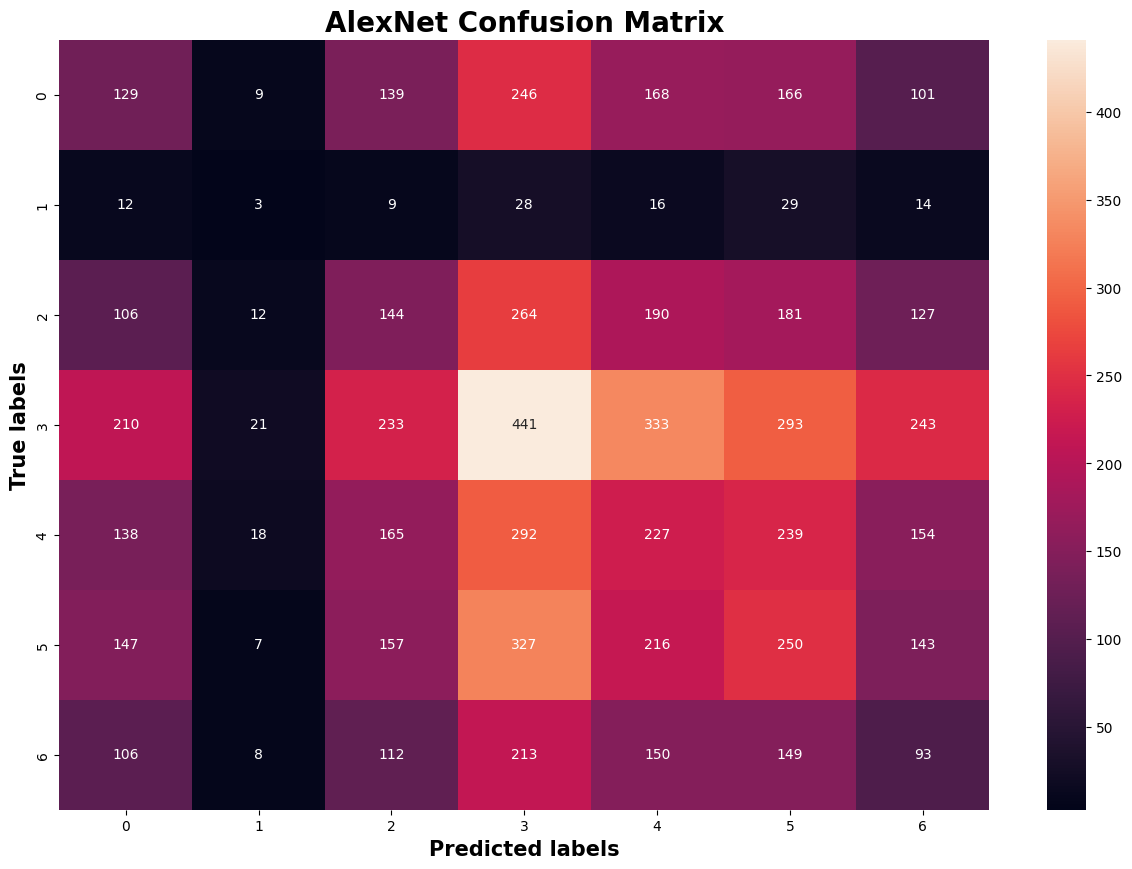

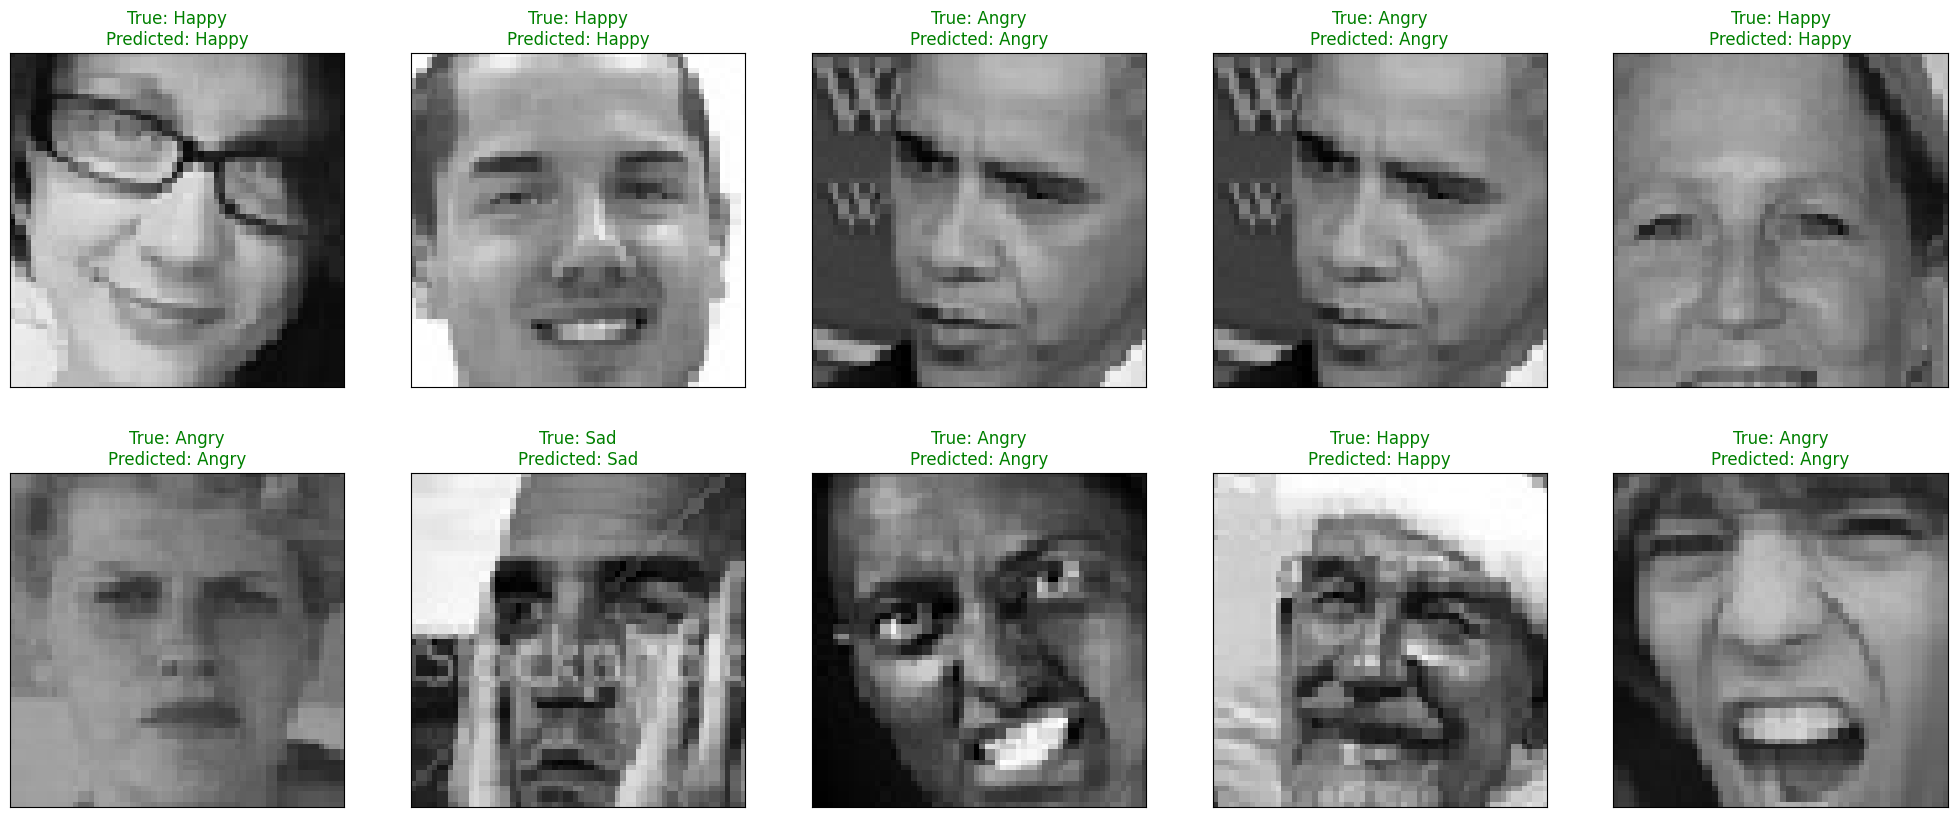

<Figure size 640x480 with 0 Axes>

In [51]:
# Make Predictions using AlexNet model
AlexNet_Predictions = alexnet.predict(valid_generator)


# Choose the highest probability class in every prediction
AlexNet_Predictions = np.argmax(AlexNet_Predictions, axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

true_labels = valid_generator.classes  # Extract true labels from the generator
cm = confusion_matrix(true_labels, AlexNet_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels', fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('AlexNet Confusion Matrix', fontsize=20, fontweight='bold')

Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

# Shuffling Test Data to show different classes
test_preprocessor = ImageDataGenerator(
        rescale=1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_width, img_height),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1, 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(alexnet.predict(tf.expand_dims(Random_Img, axis=0), verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<>:92: SyntaxWarning: invalid escape sequence '\s'
<>:92: SyntaxWarning: invalid escape sequence '\s'
C:\Users\arkak\AppData\Local\Temp\ipykernel_9616\1966660876.py:92: SyntaxWarning: invalid escape sequence '\s'
  pred_and_plot("uploads\surprise.jpg", Emotion_Classes)  # with LeNet


,name,artist,mood,popularity
0,Chop Suey!,System Of A Down,Energetic,79
1,Killing In The Name,Rage Against The Machine,Energetic,78
2,Dani California,Red Hot Chili Peppers,Energetic,77
3,Duality,Slipknot,Energetic,76
4,Uprising,Muse,Energetic,75


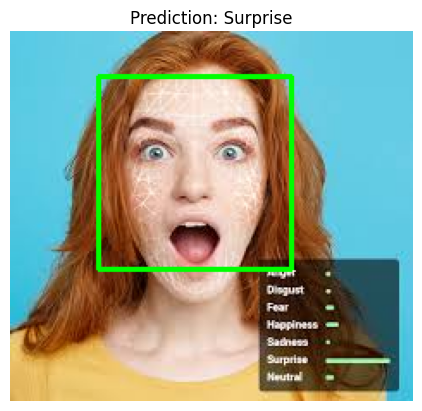

In [64]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the AlexNet model
#alexnet = load_model('alexnet_model.h5')  # Load your trained AlexNet model

# Load the dataset
Music_Player = pd.read_csv('data_moods.csv')
Music_Player = Music_Player[['name', 'artist', 'mood', 'popularity']]
Music_Player.head()

Music_Player["mood"].value_counts()
Music_Player["popularity"].value_counts()

# Function to display top songs based on mood and popularity
def Recommend_Songs(pred_class):
    if (pred_class == 'Disgust'):
        Play = Music_Player[Music_Player['mood'] == 'Sad']
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    elif (pred_class == 'Happy' or pred_class == 'Sad'):
        Play = Music_Player[Music_Player['mood'] == 'Happy']
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    elif (pred_class == 'Fear' or pred_class == 'Angry'):
        Play = Music_Player[Music_Player['mood'] == 'Calm']
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    elif (pred_class == 'Surprise' or pred_class == 'Neutral'):
        Play = Music_Player[Music_Player['mood'] == 'Energetic']
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

# Load and preprocess the image for AlexNet model
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def load_and_prep_image(filename, img_shape=64):
    img = cv2.imread(filename)
    GrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)
    
    for (x, y, w, h) in faces:
        roi_GrayImg = GrayImg[y:y + h, x:x + w]
        roi_Img = img[y:y + h, x:x + w]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        faces = faceCascade.detectMultiScale(roi_GrayImg, 1.1, 4)
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ey:ey + eh, ex:ex + ew]
    
    RGBImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGBImg = cv2.resize(RGBImg, (img_shape, img_shape))
    RGBImg = RGBImg / 255.0

    return RGBImg

# Predict class and make song recommendation using the AlexNet model
def pred_and_plot(filename, class_names):
    # Import target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction using the trained AlexNet model
    pred = alexnet.predict(np.expand_dims(img, axis=0))  # Use your trained AlexNet model here
    
    # Get the predicted class
    pred_class = class_names[pred.argmax()]
    
    # Plot the image and predicted class
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    Recommend_Songs(pred_class)

# Define Emotion Classes corresponding to your dataset
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Test the model and make song recommendations
#pred_and_plot("test/sad/PrivateTest_5341847.jpg", Emotion_Classes)  # with AlexNet
pred_and_plot("uploads\surprise.jpg", Emotion_Classes)  # with LeNet



In [65]:
alexnet.save('alexnet_model.h5')  # Saves the entire model (architecture, weights, optimizer)
